In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics

In [7]:
# perfFiles = "./scripts/sssp_trails_1_results.csv"
# new_data = pd.read_csv(fileName)
# new_data

In [8]:
def powerAnalyze(folder):
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_pow = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_pow[(int(cpuF),int(memF),int(gpuF))] = 0
        mydata = []
        for line in lines:
            line = line.replace(" ",",")
            line = line.split(",")
            value = int(line[line.index('VDD_IN')+1].split("/")[0])
            mydata.append(value)
        
        total_pow[(int(cpuF),int(memF),int(gpuF))] = statistics.mean(mydata)
    return total_pow

In [9]:
#This one needs modification
def perfAnalyze_GPU(folder="GPUBenchData"): 
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_perf = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_perf[(int(cpuF),int(memF),int(gpuF))] = {}
        mydata = {}
        idx = 0
        for line in lines:
            if idx == 28: # This one is for GPU only
                sline = line.strip().replace(" ","")
                sline = sline.split(",")
                mydata['GFlops'] = [float(sline[3]),float(sline[7]),float(sline[11]),float(sline[15])]
                mydata['GBs'] = [float(sline[4]),float(sline[8]),float(sline[12]),float(sline[16])]
                mydata['time'] = [float(sline[2]),float(sline[6]),float(sline[10]),float(sline[14])]
            idx+= 1
        total_perf[(int(cpuF),int(memF),int(gpuF))] = mydata

    return total_perf

In [10]:
perfData = perfAnalyze_GPU()
print(perfData)

{(806400, 1331200000, 930750000): {'GFlops': [72.41, 14.44, 143.66, 72.94], 'GBs': [32.18, 12.84, 31.92, 32.42], 'time': [4.17, 20.91, 4.2, 4.14]}, (1267200, 1331200000, 930750000): {'GFlops': [72.81, 14.45, 142.85, 71.78], 'GBs': [32.36, 12.84, 31.74, 31.9], 'time': [4.15, 20.9, 4.23, 4.21]}, (1113600, 1062400000, 114750000): {'GFlops': [16.05, 1.78, 32.08, 16.06], 'GBs': [7.13, 1.59, 7.13, 7.14], 'time': [18.82, 169.3, 18.83, 18.81]}, (1420800, 102000000, 726750000): {'GFlops': [5.66, 2.83, 11.55, 5.65], 'GBs': [2.51, 2.52, 2.57, 2.51], 'time': [53.4, 106.57, 52.31, 53.48]}, (1420800, 68000000, 1122000000): {'GFlops': [3.4, 1.61, 6.68, 3.41], 'GBs': [1.51, 1.43, 1.48, 1.52], 'time': [88.87, 187.28, 90.42, 88.58]}, (499200, 68000000, 216750000): {'GFlops': [3.41, 1.22, 6.46, 2.01], 'GBs': [1.51, 1.09, 1.43, 0.89], 'time': [88.66, 246.99, 93.55, 150.33]}, (652800, 102000000, 1032750000): {'GFlops': [5.85, 2.85, 10.83, 5.8], 'GBs': [2.6, 2.54, 2.41, 2.58], 'time': [51.62, 105.81, 55.79,

In [11]:
#This one needs modification
def perfAnalyze_CPU(folder="CPUBenchData"): 
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_perf = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_perf[(int(cpuF),int(memF),int(gpuF))] = {}
        mydata = {}
        idx = 0
        for line in lines:
            if idx > 12 and idx < 38:
                sline = line.strip()
                sline = sline.split(":")
                mydata[sline[0]] = float(sline[1])
            idx+= 1
        total_perf[(int(cpuF),int(memF),int(gpuF))] = mydata


    return total_perf

In [12]:
myCPU = perfAnalyze_CPU()

In [13]:
myCPU[(806400, 800000000, 1236750000)]

{'CPU_FLOATINGPOINT_MATH': 1379.0021352967537,
 'CPU_PRIME': 4.746451409744198,
 'CPU_SORTING': 2073.556255463585,
 'CPU_ENCRYPTION': 144.9792431493533,
 'CPU_COMPRESSION': 3609.924205455056,
 'CPU_SINGLETHREAD': 183.12922623289217,
 'CPU_PHYSICS': 81.54209926911678,
 'CPU_MATRIX_MULT_SSE': 305.67719912533244,
 'CPU_mm': 91.63669089528743,
 'CPU_sse': 215.1517170572408,
 'CPU_fma': 396.2026811934241,
 'CPU_avx': 0.0,
 'CPU_avx512': 0.0,
 'm_CPU_enc_SHA': 204519489.6428212,
 'm_CPU_enc_AES': 114802147.22296111,
 'm_CPU_enc_ECDSA': 136743627.7279466,
 'ME_ALLOC_S': 0.0,
 'ME_READ_S': 0.0,
 'ME_READ_L': 0.0,
 'ME_WRITE': 0.0,
 'ME_LARGE': 0.0,
 'ME_LATENCY': 0.0,
 'ME_THREADED': 0.0,
 'SUMM_CPU': 533.7187361088532,
 'SUMM_ME': 0.0}

In [14]:
#This one needs modification
def perfAnalyze_Mem(folder="MemBenchData"): 
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_perf = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_perf[(int(cpuF),int(memF),int(gpuF))] = {}
        mydata = {}
        idx = 0
        for line in lines:
            if idx > 12 and idx < 38:
                sline = line.strip()
                sline = sline.split(":")
                mydata[sline[0]] = float(sline[1])
            idx+= 1
        total_perf[(int(cpuF),int(memF),int(gpuF))] = mydata


    return total_perf

In [15]:
myMem = perfAnalyze_Mem()
myMem[(806400, 800000000, 1236750000)]

{'CPU_FLOATINGPOINT_MATH': 0.0,
 'CPU_PRIME': 0.0,
 'CPU_SORTING': 0.0,
 'CPU_ENCRYPTION': 0.0,
 'CPU_COMPRESSION': 0.0,
 'CPU_SINGLETHREAD': 0.0,
 'CPU_PHYSICS': 0.0,
 'CPU_MATRIX_MULT_SSE': 0.0,
 'CPU_mm': 0.0,
 'CPU_sse': 0.0,
 'CPU_fma': 0.0,
 'CPU_avx': 0.0,
 'CPU_avx512': 0.0,
 'm_CPU_enc_SHA': 0.0,
 'm_CPU_enc_AES': 0.0,
 'm_CPU_enc_ECDSA': 0.0,
 'ME_ALLOC_S': 403.463591933359,
 'ME_READ_S': 2692.865686035156,
 'ME_READ_L': 2258.09619140625,
 'ME_WRITE': 3035.193603515625,
 'ME_LARGE': 4212.0,
 'ME_LATENCY': 257.90477309865383,
 'ME_THREADED': 3843.2313842773438,
 'SUMM_CPU': 0.0,
 'SUMM_ME': 401.5253072255278}

In [16]:
cpu_list = list(map(lambda x:x[0], perfData.keys()))
cpu_list = set(cpu_list)
cpu_list = sorted(list(cpu_list))
print(cpu_list)
mem_list = list(map(lambda x:x[1], perfData.keys()))
mem_list = set(mem_list)
mem_list = sorted(list(mem_list))
print(mem_list)  
gpu_list = list(map(lambda x:x[2], perfData.keys()))
gpu_list = set(gpu_list)
gpu_list = sorted(list(gpu_list))
print(gpu_list) 
    
    


[345600, 499200, 652800, 806400, 960000, 1113600, 1267200, 1420800]
[40800000, 68000000, 102000000, 204000000, 408000000, 665600000, 800000000, 1062400000, 1331200000, 1600000000, 1866000000]
[114750000, 216750000, 318750000, 420750000, 522750000, 624750000, 726750000, 854250000, 930750000, 1032750000, 1122000000, 1236750000, 1300500000]


In [17]:
mem_freq_display_list = [val/1000000 for val in mem_list]
cpu_freq_display_list = [val/1000 for val in cpu_list]
gpu_freq_display_list = [val/1000000 for val in gpu_list]

In [18]:
powerAnalyze("TegraDataGPU")

{(345600, 408000000, 420750000): 2347.914191419142,
 (806400, 1600000000, 114750000): 2814.2041884816754,
 (652800, 40800000, 114750000): 1920.7710750193348,
 (1267200, 1600000000, 420750000): 3414.936102236422,
 (1267200, 1866000000, 318750000): 3968.549636803874,
 (806400, 40800000, 114750000): 1957.5547892720306,
 (1113600, 40800000, 522750000): 2255.6595365418893,
 (960000, 1331200000, 1032750000): 4248.1,
 (1113600, 40800000, 854250000): 2526.718220338983,
 (960000, 1866000000, 420750000): 4002.74358974359,
 (960000, 1600000000, 318750000): 3159.3333333333335,
 (1420800, 40800000, 216750000): 2239.567664670659,
 (1267200, 408000000, 1032750000): 4230.3884892086335,
 (652800, 1331200000, 1122000000): 4474.366666666667,
 (1113600, 1600000000, 114750000): 2898.5975820379967,
 (960000, 1331200000, 1300500000): 5557.419047619048,
 (960000, 408000000, 624750000): 2733.705069124424,
 (345600, 40800000, 726750000): 2223.4901531728665,
 (1420800, 102000000, 1032750000): 3394.9,
 (652800, 2

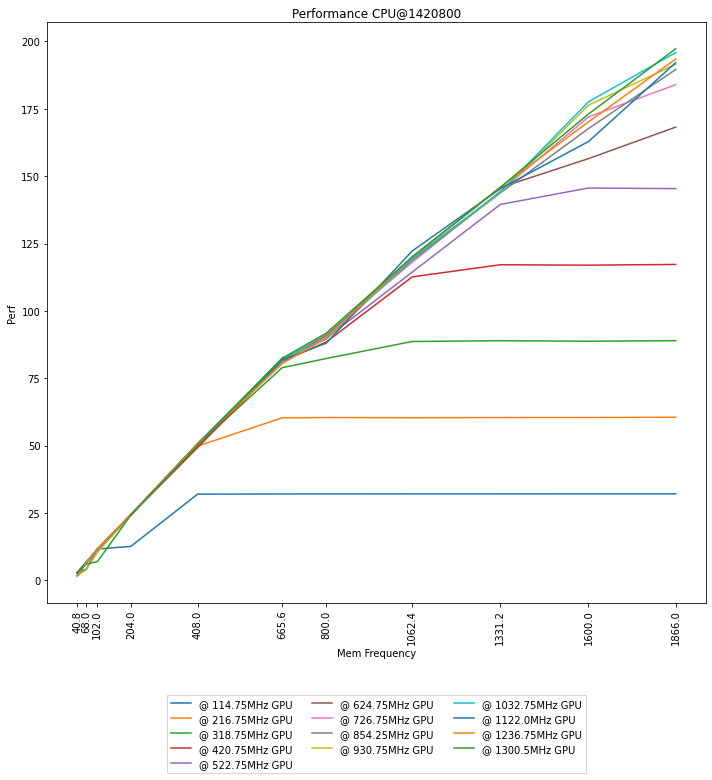

In [19]:
## Plot the impact of Mem, GPU, and CPU

#fixedCPU
cpu_f = cpu_list[7]

# xs = gpu_freq_display_list
xs = mem_freq_display_list
ys = []
ys_label = []
# for j,mem_f in enumerate(mem_list):
#     ytemp = []
#     for gpu_f in gpu_list:
#         ytemp.append(perfData[(cpu_f,mem_f,gpu_f)]['GFlops'][3])
#     ys.append(ytemp)
#     ys_label.append("@ {}MHz MEM".format(mem_freq_display_list[j]))

for j,gpu_f in enumerate(gpu_list):
    ytemp = []
    for mem_f in mem_list:
        ytemp.append(perfData[(cpu_f,mem_f,gpu_f)]['GFlops'][2])
    ys.append(ytemp)
    ys_label.append("@ {}MHz GPU".format(gpu_freq_display_list[j]))

fig = plt.figure(figsize=(10,10))
# figsize=(1,1)
ax = plt.subplot(111)
for i, y in enumerate(ys):
    ax.plot(xs, y, label=ys_label[i])
plt.xticks(xs, mem_freq_display_list,rotation=90)
plt.title("Performance CPU@{}".format(cpu_f))
plt.xlabel("Mem Frequency")
plt.ylabel("Perf")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=False, shadow=False, ncol=3)
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import pearsonr   
from scipy.stats import spearmanr

In [21]:
perfDataGPU = perfAnalyze_GPU()
dFreq = [[],[],[]]
perfD = []
for key in perfDataGPU:
    dFreq[0].append(key[0])
    dFreq[1].append(key[1])
    dFreq[2].append(key[2])
    perfD.append(perfDataGPU[key]['GFlops'][1])
print(pearsonr(dFreq[2],perfD))
print("CPUF-GPUP :",spearmanr(dFreq[0],perfD))
print("MemF-GPUP :",spearmanr(dFreq[1],perfD))
print("GPUF-GPUP :",spearmanr(dFreq[2],perfD))
    
    

PearsonRResult(statistic=0.5864457471792096, pvalue=1.2215711678833512e-106)
CPUF-GPUP : SignificanceResult(statistic=0.003060691282569032, pvalue=0.9176383346806561)
MemF-GPUP : SignificanceResult(statistic=0.6912858227097546, pvalue=2.4079985906915428e-163)
GPUF-GPUP : SignificanceResult(statistic=0.49355092419776364, pvalue=2.805957051676772e-71)


In [22]:
perfDataCPU = perfAnalyze_CPU()
# print(perfDataCPU)
dFreq = [[],[],[]]
perfD = []
for key in perfDataCPU:
    dFreq[0].append(key[0])
    dFreq[1].append(key[1])
    dFreq[2].append(key[2])
    perfD.append(perfDataCPU[key]['SUMM_CPU'])
print(pearsonr(dFreq[0],perfD))
print("CPUF-CPUP : ",spearmanr(dFreq[0],perfD))
print("MemF-CPUP : ",spearmanr(dFreq[1],perfD))
print("GPUF-CPUP : ",spearmanr(dFreq[2],perfD))

PearsonRResult(statistic=0.7297433542056037, pvalue=8.736901827267894e-191)
CPUF-CPUP :  SignificanceResult(statistic=0.7506942581104997, pvalue=8.025522493784662e-208)
MemF-CPUP :  SignificanceResult(statistic=0.48169742821099554, pvalue=1.6587493438563297e-67)
GPUF-CPUP :  SignificanceResult(statistic=0.0026931048522732086, pvalue=0.9275008093549142)


In [23]:
perfDataMem = perfAnalyze_Mem()
# print(perfDataCPU)
dFreq = [[],[],[]]
perfD = []
for key in perfDataMem:
    dFreq[0].append(key[0])
    dFreq[1].append(key[1])
    dFreq[2].append(key[2])
    perfD.append(perfDataMem[key]['SUMM_ME'])
print(pearsonr(dFreq[1],perfD))
print("CPUF-MemP : ",spearmanr(dFreq[0],perfD))
print("MemF-MemP : ",spearmanr(dFreq[1],perfD))
print("GPUF-MemP : ",spearmanr(dFreq[2],perfD))

PearsonRResult(statistic=0.8180673715155673, pvalue=1.2772592366897966e-276)
CPUF-MemP :  SignificanceResult(statistic=0.3602437715523054, pvalue=2.204755546508743e-36)
MemF-MemP :  SignificanceResult(statistic=0.8700002218295807, pvalue=0.0)
GPUF-MemP :  SignificanceResult(statistic=-0.0007442013645696896, pvalue=0.9799403752801569)


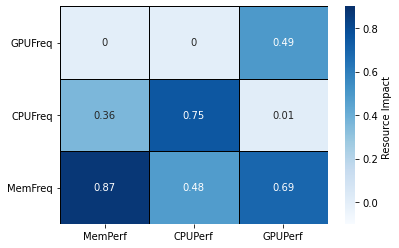

In [37]:
import pandas as pd
import seaborn as sb
# Create a dataFrame using dictionary
np.bool = np.bool_ 
data =pd.DataFrame([[0.00,0.0,0.49],[0.36,0.75,0.01],[0.87,0.48,0.69]])
xtick = ['MemPerf','CPUPerf','GPUPerf']
ytick = ['GPUFreq','CPUFreq','MemFreq']
data.columns = ['MemPerf', 'CPUPerf', 'GPUPerf']
data.index = ['GPUFreq', 'CPUFreq', 'MemFreq']
sb.heatmap(data,cmap="Blues", annot=True,vmin=-0.1,vmax=0.9,cbar_kws={'label': 'Resource Impact '},linecolor='black',linewidths=1)
plt.yticks(rotation=0) 

# plt.show()
plt.savefig("RI_TX2.svg")